# Implimentation of Perceptrons from scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

<img width="1024" alt="ArtificialNeuronModel english" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/60/ArtificialNeuronModel_english.png/1024px-ArtificialNeuronModel_english.png">

In [65]:
class CustomNN:
    def __init__(self, eta, epochs, activationFunction):
        self.weights = np.random.randn(3) * 1e-4
        print("initial weights\n", self.weights)
        self.eta = eta
        self.epochs = epochs
        self.activationFunction = activationFunction
        
    def fit(self,X, y):
        self.X = X
        self.y = y        
        X_with_bias =  np.c_[self.X, -np.ones((len(self.X), 1))]
        print("\nX_with_bias\n",X_with_bias)
        
        for _ in range(self.epochs):

            y_hat = self.activationFunction(X_with_bias, self.weights)
            print("\ny_hat\n", y_hat)
            error = self.y - y_hat
            print("\nerror\n", error)
            print("\nX_with_bias.T\n", X_with_bias.T)
            print("\nnp.dot(X_with_bias.T, error)\n", np.dot(X_with_bias.T, error))
            print("\nself.eta * np.dot(X_with_bias.T, error)\n", self.eta * np.dot(X_with_bias.T, error))
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, error)
            print("\nupdated self.weights\n",self.weights)
            print(f"\n####### {_} epoch ends #####")
    def predict(self, X):
        X = np.c_[X, -np.ones((len(X), 1))]
        return self.activationFunction(X, self.weights)

## 1. AND gate

In [66]:
data = {'x1':(0,0,1,1),
        'x2':(0,1,0,1),
        'y' :(0,0,0,1)}
AND = pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [67]:
X = AND.drop('y', axis=1)
X


,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [68]:
y = AND['y']
y.to_frame()

,y
0,0
1,0
2,0
3,1


In [69]:
activationFunction = lambda inputs, weights: np.where(np.dot(inputs, weights) > 0, 1, 0)


In [70]:
model = CustomNN(eta=0.01, epochs=10, activationFunction=activationFunction)
model.fit(X, y)

initial weights
 [-3.09631694e-05 -2.00228501e-04 -9.62196596e-05]

X_with_bias
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

y_hat
 [1 0 1 0]

error
 0   -1
1    0
2   -1
3    1
Name: y, dtype: int64

X_with_bias.T
 [[ 0.  0.  1.  1.]
 [ 0.  1.  0.  1.]
 [-1. -1. -1. -1.]]

np.dot(X_with_bias.T, error)
 [0. 1. 1.]

self.eta * np.dot(X_with_bias.T, error)
 [0.   0.01 0.01]

updated self.weights
 [-3.09631694e-05  9.79977150e-03  9.90378034e-03]

####### 0 epoch ends #####

y_hat
 [0 0 0 0]

error
 0    0
1    0
2    0
3    1
Name: y, dtype: int64

X_with_bias.T
 [[ 0.  0.  1.  1.]
 [ 0.  1.  0.  1.]
 [-1. -1. -1. -1.]]

np.dot(X_with_bias.T, error)
 [ 1.  1. -1.]

self.eta * np.dot(X_with_bias.T, error)
 [ 0.01  0.01 -0.01]

updated self.weights
 [ 9.96903683e-03  1.97997715e-02 -9.62196596e-05]

####### 1 epoch ends #####

y_hat
 [1 1 1 1]

error
 0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64

X_with_bias.T
 [[ 0.  0.  1.  1.]
 [ 0.  1.  0.  1.]
 [-1. -1. -1. -1.]

In [58]:
model.predict(X)

array([0, 0, 0, 1])

## 2. OR Gate

In [17]:
data = {'x1': (0,0,1,1), 'x2': (0,1,0,1), 'y': (0,1,1,1)}
OR = pd.DataFrame(data)
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [18]:
X = OR.drop('y', axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [19]:
y = OR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,1


In [20]:
model = CustomNN(eta=0.01, epochs=10, activationFunction=activationFunction)
model.fit(X, y)

In [21]:
model.predict(X)

array([0, 1, 1, 1])

## 3. XOR Gate

In [22]:
data = {'x1':(0,0,1,1),
        'x2':(0,1,0,1),
        'y' :(0,1,1,0)}

XOR = pd.DataFrame(data)
XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [23]:
X = XOR.drop('y', axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [24]:
y = XOR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,0


In [25]:
model = CustomNN(eta=0.01, epochs=10, activationFunction=activationFunction)
model.fit(X, y)

In [26]:
model.predict(X) # Doesn't perform well because a unit AN is just a linear binary classifier

array([1, 1, 1, 1])

### Analysis of above experiments with graphs -

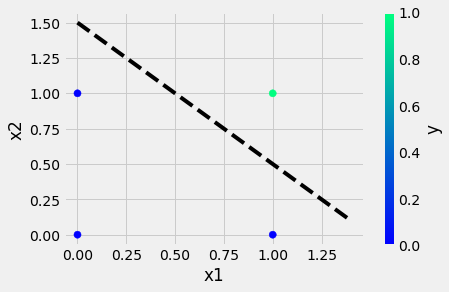

In [27]:
AND.plot(kind='scatter', x='x1', y='x2', c='y', s=50,  colormap='winter')
plt.plot(np.linspace(0,1.4), 1.5 - 1*np.linspace(0,1.4), 'k--');

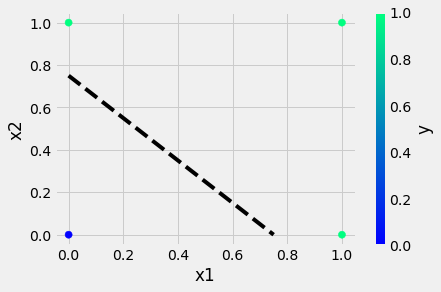

In [28]:
OR.plot(kind='scatter', x='x1', y='x2', c='y', s=50,  colormap='winter')
plt.plot(np.linspace(0,0.75), 0.75 - 1*np.linspace(0,0.75), 'k--');

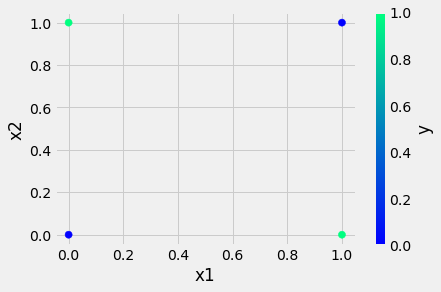

In [29]:
XOR.plot(kind='scatter', x='x1', y='x2', c='y', s=50,  colormap='winter');


## Sklearn already Have Perceptron Class

In [31]:
from sklearn.linear_model import Perceptron

In [32]:
clf = Perceptron()
clf.fit(X,y)

Perceptron()

In [33]:
clf.predict([[0,1]])

array([0], dtype=int64)

![](https://www.researchgate.net/publication/335233129/figure/fig1/AS:793453613023232@1566185491372/Constructing-planar-crossover-gadgets-with-NAND-gates-a-XOR-symbol-b-NAND-symbol.png)